In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Jewish Data Cleaning and EDA

##### Reading teh dataframe:

In [2]:
jewish_df = pd.read_csv('./data/jewish_posts.csv')

In [3]:
jewish_df.head(3)

,subreddit,selftext,author_fullname,gilded,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,...,preview,link_flair_template_id,crosspost_parent_list,crosspost_parent,is_gallery,media_metadata,gallery_data,poll_data,author_cakeday,edited_on
0,Jewish,NaN,t2_e6jjoxd2,0,i don't speak Hebrew i want to learn about it ...,[],r/Jewish,False,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jewish,NaN,t2_8ptb30ld,0,"On Friday, I like to listen to the music of Je...",[],r/Jewish,False,6,NaN,...,{'images': [{'source': {'url': 'https://extern...,7b0a3ee4-bfc3-11eb-a1de-0ef3c70140b1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jewish,NaN,t2_1xtoqqdo,0,"As a Patrilineal Jew, I See Myself in the Gole...",[],r/Jewish,False,6,NaN,...,{'images': [{'source': {'url': 'https://extern...,f243c26e-bea3-11e9-84cd-0ea8c9a3cdd0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
jewish_df.shape

(1997, 98)

In [5]:
jewish_df.columns

Index(['subreddit', 'selftext', 'author_fullname', 'gilded', 'title',
       'link_flair_richtext', 'subreddit_name_prefixed', 'hidden', 'pwls',
       'link_flair_css_class', 'thumbnail_height', 'top_awarded_type',
       'hide_score', 'quarantine', 'link_flair_text_color', 'upvote_ratio',
       'author_flair_background_color', 'subreddit_type',
       'total_awards_received', 'media_embed', 'thumbnail_width',
       'author_flair_template_id', 'is_original_content', 'secure_media',
       'is_reddit_media_domain', 'is_meta', 'category', 'secure_media_embed',
       'link_flair_text', 'score', 'is_created_from_ads_ui', 'author_premium',
       'thumbnail', 'edited', 'author_flair_css_class',
       'author_flair_richtext', 'gildings', 'content_categories', 'is_self',
       'link_flair_type', 'wls', 'removed_by_category', 'author_flair_type',
       'domain', 'allow_live_comments', 'suggested_sort', 'view_count',
       'archived', 'no_follow', 'is_crosspostable', 'pinned', 'over_18'

In [6]:
jewish_df['title'].isnull().sum(), jewish_df['subreddit'].isnull().sum(), jewish_df['author'].isnull().sum()

(0, 0, 0)

- There are no nulls in the 'title', 'author' and 'subreddit' columns

##### Check for duplicated titles:

In [7]:
jewish_df['title'].value_counts()

Am I Jewish?                                                                                                                           4
Does anyone else have Jewish identity issues?                                                                                          3
They're a little confused, but they've got the (holiday) spirit!                                                                       3
Parshat Toldot The Isaac Way. Using Your Own Strengths | Toldot                                                                        3
I'm looking for insight and advice on how to approach a family member that is posting borderline antisemitic items on social media!    3
                                                                                                                                      ..
Hava Nagila song sounds nice. Is there any other popular Jewish folk music? on what occasions one might hear it?                       1
Question about a menorah I saw on social 

Drop duplicated titles:

In [8]:
jewish_df = jewish_df.drop_duplicates(subset=['title'], keep='first')

In [9]:
jewish_df['title'].duplicated().sum()

0

In [10]:
#make sure all 'subreddit' == 'Jewish'
jewish_df['subreddit'].unique()

array(['Jewish'], dtype=object)

([], [])

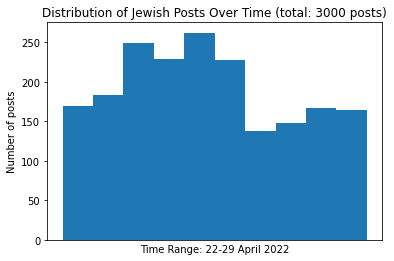

In [12]:
# Look at distribution of time posted:
plt.hist(jewish_df['created_utc'])
plt.title('Distribution of Jewish Posts Over Time (total: 3000 posts)')
plt.xlabel('Time Range: 22-29 April 2022')
plt.ylabel('Number of posts')
plt.xticks([])

In [19]:
jewish_df['created_utc'][0], jewish_df['created_utc'][1996]

# latest post in df: Thursday, 26 January 2023 12:15:10
# earliest post in df: Tuesday, 15 November 2022 19:18:47

(1674735310, 1668539927)

In [20]:
# fig, ax = plt.subplots(1, 2, figsize=(20,6))

# ax[0].hist(women_df['created_utc'], bins = 10)
# ax[0].set_title("AskWomen")
# ax[0].set_xlabel("Posting Date")
# ax[0].set_ylabel("Number of posts")

# ax[1].hist(men_df['created_utc'], bins = 10)
# ax[1].set_title("AskMen")
# ax[1].set_xlabel("Posting Date")
# ax[1].set_ylabel("Number of posts")
# ax[1].set_xticklabels([0, 1])

In [21]:
#create a new dataframe consisted of 4 columns: title, seltext, author & subreddit

In [22]:
jew_posts_df = jewish_df.loc[:, ['title','author', 'subreddit']]

In [23]:
jew_posts_df.head(3)

,title,author,subreddit
0,i don't speak Hebrew i want to learn about it ...,comoestas969696,Jewish
1,"On Friday, I like to listen to the music of Je...",ElikoBass,Jewish
2,"As a Patrilineal Jew, I See Myself in the Gole...",IllogicalLunarBear,Jewish


##### Save new data frame as csv file:

In [24]:
jew_posts_df.to_csv('./data/jewish_titles.csv', index=False)

### Israel Data Cleaning and EDA

In [26]:
israel_df = pd.read_csv('./data/israel_posts.csv')

In [28]:
israel_df.head(2)

,subreddit,selftext,author_fullname,gilded,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,...,retrieved_utc,updated_utc,utc_datetime_str,post_hint,url_overridden_by_dest,preview,is_gallery,media_metadata,gallery_data,author_cakeday
0,Israel,[removed],t2_3ay35ze1,0,Where can I find info about the current protests?,"[{'e': 'text', 't': 'Ask The Sub'}]",r/Israel,False,0.0,askthesub,...,1674755688,1674755689,2023-01-26 17:54:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Israel,NaN,t2_g0zik9vg,0,What are the chances for an escalation (rocket...,"[{'e': 'text', 't': 'Ask The Sub'}]",r/Israel,False,0.0,askthesub,...,1674755274,1674755275,2023-01-26 17:47:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
israel_df.shape

(1998, 94)

In [30]:
#check for nulls:
israel_df['title'].isnull().sum(), israel_df['subreddit'].isnull().sum(), israel_df['author'].isnull().sum()

(0, 0, 0)

- There are no nulls in the 'title', 'author' and 'subreddit' columns

In [31]:
#make sure all 'subreddit' == 'AskMen'
israel_df['subreddit'].unique()

array(['Israel'], dtype=object)

([], [])

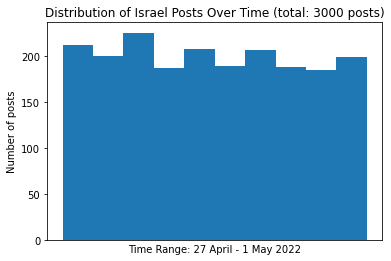

In [32]:
# Look at distribution of time posted:
plt.hist(israel_df['created_utc'])
plt.title('Distribution of Israel Posts Over Time (total: 3000 posts)')
plt.xlabel('Time Range: 27 April - 1 May 2022')
plt.ylabel('Number of posts')
plt.xticks([])

In [34]:
israel_df['created_utc'][0], israel_df['created_utc'][1997]

# latest post in df: Thursday, 26 January 2023 17:54:36
# earliest post in df: Thursday, 24 November 2022 20:14:15

(1674755676, 1669320855)

In [35]:
israel_df.shape

(1998, 94)

##### Check for duplicated titles:

In [36]:
israel_df['title'].value_counts()

Rolls Royce's new NFT collection is Live! 800 NFTs for the first 800 people!                 5
Get A free $750 Shein Card! See if you qualify below!                                        4
Get a free $750 CashApp Card! New Cash App Hack Method! Only 72 left                         4
Bring Adam home                                                                              3
Israel's High Court blocks Arye Deri from serving as minister                                3
                                                                                            ..
One more reason to hate the ministry of education                                            1
URGENT Is it possible to withdraw money without a card and only using phone? If so where?    1
Nice try waze                                                                                1
Civilian firearm training in Israel                                                          1
Iran 'should make Netanyahu their slave': IRGC com

In [37]:
israel_df['title'].duplicated().sum()

72

The dataset contains 72 duplicate titles.

Exploring the duplicated values:

In [38]:
pd.set_option('display.max_columns', 10000)

In [39]:
israel_df[israel_df['title'].duplicated()]

,subreddit,selftext,author_fullname,gilded,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,thumbnail_height,top_awarded_type,hide_score,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,score,is_created_from_ads_ui,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,link_flair_type,wls,removed_by_category,author_flair_type,domain,allow_live_comments,suggested_sort,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,link_flair_template_id,can_gild,spoiler,locked,author_flair_text,treatment_tags,removed_by,distinguished,subreddit_id,link_flair_background_color,id,is_robot_indexable,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,retrieved_utc,updated_utc,utc_datetime_str,post_hint,url_overridden_by_dest,preview,is_gallery,media_metadata,gallery_data,author_cakeday
23,Israel,NaN,t2_1jdbgqcu,0,What do you think of sabich ovad in givataim,"[{'e': 'text', 't': 'Ask The Sub'}]",r/Israel,False,0.0,askthesub,NaN,NaN,True,False,dark,1.0,NaN,public,0,{},NaN,NaN,False,NaN,False,False,NaN,{},Ask The Sub,1,False,False,self,False,NaN,[],{},NaN,True,richtext,0.0,reddit,text,self.Israel,False,NaN,NaN,False,True,False,False,False,[],[],False,314b56ac-3be7-11e8-8e4a-0e6791b7ea10,True,False,False,NaN,[],NaN,NaN,t5_2qhvo,NaN,10ldjfd,False,Glass_Chocolate9501,NaN,0,True,no_ads,False,False,NaN,/r/Israel/comments/10ldjfd/what_do_you_think_o...,no_ads,False,https://www.reddit.com/r/Israel/comments/10ldj...,187629,1674690263,0,NaN,False,1674690274,1674690275,2023-01-25 23:44:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,Israel,NaN,t2_6gp7d,0,Our supreme leader,"[{'e': 'text', 't': 'News/Politics'}]",r/Israel,False,0.0,polnews,140.0,NaN,True,False,dark,1.0,NaN,public,0,{},140.0,NaN,False,NaN,True,False,NaN,{},News/Politics,1,False,False,https://b.thumbs.redditmedia.com/WhAkxSPAwaQ6p...,False,NaN,[],{},NaN,False,richtext,0.0,reddit,text,i.redd.it,False,NaN,NaN,False,True,False,False,False,[],[],False,326b5140-5eaf-11e4-9ba9-12313b0b1941,True,False,False,NaN,[],NaN,NaN,t5_2qhvo,NaN,10ktuwk,False,dannysi,NaN,0,True,no_ads,False,False,NaN,/r/Israel/comments/10ktuwk/our_supreme_leader/,no_ads,False,https://i.redd.it/o1nve4v3g5ea1.jpg,187619,1674635021,0,NaN,False,1674635034,1674635034,2023-01-25 08:23:41,image,https://i.redd.it/o1nve4v3g5ea1.jpg,{'images': [{'source': {'url': 'https://previe...,NaN,NaN,NaN,NaN
72,Israel,[removed],t2_2qw5wf78,0,What's the chance of Israel becoming a religio...,"[{'e': 'text', 't': 'Ask The Sub'}]",r/Israel,False,0.0,askthesub,NaN,NaN,True,False,dark,1.0,NaN,public,0,{},NaN,NaN,False,NaN,False,False,NaN,{},Ask The Sub,1,False,False,self,False,NaN,[],{},NaN,True,richtext,0.0,reddit,text,self.Israel,False,NaN,NaN,False,True,False,False,False,[],[],False,314b56ac-3be7-11e8-8e4a-0e6791b7ea10,True,False,False,NaN,[],NaN,NaN,t5_2qhvo,NaN,10k4pkg,False,bodyfounder,NaN,0,True,no_ads,False,False,NaN,/r/Israel/comments/10k4pkg/whats_the_chance_of...,no_ads,False,https://www.reddit.com/r/Israel/comments/10k4p...,187592,1674564516,0,NaN,False,1674564527,1674564528,2023-01-24 12:48:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,Israel,NaN,t2_5tgy6yd,0,Israeli society doesn't actually want haredim ...,"[{'e': 'text', 't': 'News/Politics'}]",r/Israel,False,0.0,polnews,91.0,NaN,True,False,dark,1.0,NaN,public,0,{},140.0,NaN,False,NaN,False,False,NaN,{},News/Politics,1,False,False,https://b.thumbs.redditmedia.com/93_M2HrEzBQTl...,False,il,"[{'e': 'text', 't': 'Bet Shemesh'}]",{},NaN,False,richtext,0.0,moderator,richtext,m.jpost.

Drop duplicates:

In [40]:
# dropping duplicates
israel_df = israel_df.drop_duplicates(subset=['title'], keep='first')

In [42]:
israel_df.shape

(1926, 94)

In [43]:
israel_df['title'].duplicated().sum()

0

In [374]:
#create a new dataframe consisted of 4 columns: title, seltext, author & subreddit

In [44]:
israel_posts_df = israel_df.loc[:, ['title','author', 'subreddit']]

In [45]:
israel_posts_df.head(3)

,title,author,subreddit
0,Where can I find info about the current protests?,MrIdiot-san,Israel
1,What are the chances for an escalation (rocket...,Illustrious-Olive905,Israel
2,Tel Aviv-based payroll giant Papaya Global say...,bshapiro24,Israel


##### Save new data frame as csv file:

In [46]:
israel_posts_df.to_csv('./Data/israel_titles.csv', index=False)

### Binarize subreddit column and create a comnibned data frame: 

In [47]:
# binarize our classifier: 'is_xx'
israel_posts_df['is_il'] = 1
jew_posts_df['is_il'] = 0

In [48]:
modeling_df = pd.concat([israel_posts_df, jew_posts_df])

In [49]:
modeling_df.head()

,title,author,subreddit,is_il
0,Where can I find info about the current protests?,MrIdiot-san,Israel,1
1,What are the chances for an escalation (rocket...,Illustrious-Olive905,Israel,1
2,Tel Aviv-based payroll giant Papaya Global say...,bshapiro24,Israel,1
3,When tv gives history the spotlight! Greek sta...,Fizzmeaway,Israel,1
4,"Possible issues entering/leaving as ""former"" c...",DDC_Techineer,Israel,1


In [50]:
modeling_df.sample(5)

,title,author,subreddit,is_il
858,"Ex-diplomats, ambassadors warn new government ...",Pilast,Israel,1
323,The ADL published the results of a survey cond...,MijTinmol,Jewish,0
1559,Go vote no,astroFiber,Israel,1
1331,Captain America was widely celebrated for punc...,CosmicTurtle504,Jewish,0
942,Israel ranked 4th-best-performing economy amon...,Vailhem,Israel,1


In [51]:
modeling_df.shape

(3862, 4)

In [52]:
modeling_df.duplicated().sum()

0

In [53]:
modeling_df.isnull().sum()

title        0
author       0
subreddit    0
is_il        0
dtype: int64

In [54]:
modeling_df.is_il.value_counts()

0    1936
1    1926
Name: is_il, dtype: int64

In [55]:
modeling_df.to_csv('./data/modeling_df.csv', index=False)

The above data frame will be used for the modeling process.